In [1]:
import numpy as np
import pandas as pd

In [2]:
fr=pd.read_csv("C:\\ksr\\data science\\DS_batch1\\datasets\\Transactions_sample.csv")

In [3]:
fr.shape

(210, 4)

In [4]:
fr.head()

id  Total_Amount  Tr_Count_week  Fraud_id
0  16078       7294.60           4.79         0
1  41365       7659.53           2.45         0
2  11666       8259.29          10.77         0
3  11824      11630.25          15.29         1
4  36414      12286.63          22.18         1

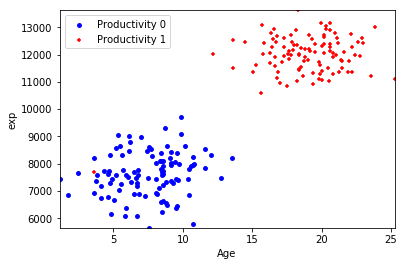

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(fr.Tr_Count_week[fr.Fraud_id==0],fr.Total_Amount[fr.Fraud_id==0], s=15, c='b', marker="o", label='Productivity 0')
ax1.scatter(fr.Tr_Count_week[fr.Fraud_id==1],fr.Total_Amount[fr.Fraud_id==1], s=15, c='r', marker="+", label='Productivity 1')

plt.xlim(min(fr.Tr_Count_week), max(fr.Tr_Count_week))
plt.ylim(min(fr.Total_Amount), max(fr.Total_Amount))
plt.legend(loc='best');
plt.xlabel("Age")
plt.ylabel("exp")
plt.show()

In [7]:
fr.columns

Index(['id', 'Total_Amount', 'Tr_Count_week', 'Fraud_id'], dtype='object')

In [8]:
x_train=fr.drop(["id","Fraud_id"],axis=1)
y_train=fr["Fraud_id"]

In [13]:
from sklearn.svm import SVC
sn=SVC(probability=True)
sn.fit(x_train,y_train)

C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
fr["pred"]=sn.predict(x_train)

In [11]:
fr.head()

id  Total_Amount  Tr_Count_week  Fraud_id  pred
0  16078       7294.60           4.79         0     0
1  41365       7659.53           2.45         0     0
2  11666       8259.29          10.77         0     0
3  11824      11630.25          15.29         1     1
4  36414      12286.63          22.18         1     1

In [14]:
sn.predict_proba(x_train)

array([[0.56743474, 0.43256526],
       [0.56727607, 0.43272393],
       [0.56727607, 0.43272393],
       [0.42399666, 0.57600334],
       [0.42403017, 0.57596983],
       [0.42402113, 0.57597887],
       [0.42399705, 0.57600295],
       [0.42399607, 0.57600393],
       [0.42399607, 0.57600393],
       [0.42399597, 0.57600403],
       [0.42399952, 0.57600048],
       [0.56727607, 0.43272393],
       [0.56727607, 0.43272393],
       [0.42399952, 0.57600048],
       [0.56798912, 0.43201088],
       [0.56727607, 0.43272393],
       [0.56727607, 0.43272393],
       [0.45371835, 0.54628165],
       [0.42403212, 0.57596788],
       [0.56727607, 0.43272393],
       [0.56727607, 0.43272393],
       [0.56727607, 0.43272393],
       [0.42399952, 0.57600048],
       [0.56727607, 0.43272393],
       [0.42402253, 0.57597747],
       [0.42399969, 0.57600031],
       [0.56727607, 0.43272393],
       [0.42397949, 0.57602051],
       [0.56727644, 0.43272356],
       [0.42403571, 0.57596429],
       [0.

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(fr["Fraud_id"],fr["pred"])

1.0

In [16]:
sn.coef_

AttributeError: coef_ is only available when using a linear kernel

In [17]:
from sklearn.svm import SVC
sn=SVC(probability=True,kernel="linear")
sn.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
sn.coef_

array([[0.00424291, 0.29599856]])

In [19]:
sn.intercept_

array([-46.04992885])

In [20]:
sn.predict_proba(x_train)

array([[9.99234275e-01, 7.65725193e-04],
       [9.98804803e-01, 1.19519693e-03],
       [9.83840799e-01, 1.61592008e-02],
       [1.77361418e-02, 9.82263858e-01],
       [6.47000719e-06, 9.99993530e-01],
       [4.36083052e-06, 9.99995639e-01],
       [4.25085039e-03, 9.95749150e-01],
       [5.98710754e-03, 9.94012892e-01],
       [8.05953614e-07, 9.99999194e-01],
       [1.72803377e-07, 9.99999827e-01],
       [2.46741325e-06, 9.99997533e-01],
       [9.77842890e-01, 2.21571101e-02],
       [9.98487295e-01, 1.51270523e-03],
       [1.71220964e-02, 9.82877904e-01],
       [9.97490847e-01, 2.50915261e-03],
       [9.96685369e-01, 3.31463121e-03],
       [9.99421509e-01, 5.78490746e-04],
       [9.98392196e-01, 1.60780380e-03],
       [2.84120287e-03, 9.97158797e-01],
       [9.98525871e-01, 1.47412907e-03],
       [9.66636902e-01, 3.33630977e-02],
       [9.99928836e-01, 7.11641051e-05],
       [2.56900213e-06, 9.99997431e-01],
       [9.82360877e-01, 1.76391233e-02],
       [2.909295

In [21]:
fr["pred1"]=sn.predict(x_train)

In [22]:
accuracy_score(fr["Fraud_id"],fr["pred1"])

0.9952380952380953